# 2-6-Transcription-factors-plots-R
Jakke Neiro$^1$
1. Aboobaker laboratory, Department of Zoology, University of Oxford

## Contents of notebook
* 1. Introduction
* 2. Expression values
    * 2.1 Ternary plot
    * 2.2 Clustering heatmap
* 3. Transcription factor classes
    * 3.1 Basic domains
    * 3.2 Zinc domains
    * 3.3 Helix-turn-helix domains
    * 3.4 Other domains
* 4. Motifs
    * 4.1 Proportion of TFs with motif
    * 4.2 Information value histogram
    * 4.3 Information value logos

## Files
* Input: Transcription_factors_01072021_values.csv, Matrix meme files
* Output: 
    * Fig 2-6-1 Ternary plot of transcription factor expression values
    * Fig 2-6-2 Hierarchical clustering of proportional expression values
    * Fig 2-6-3 Classification and characterisation of TFs with a basic domain
    * Fig 2-6-4 Classification and characterisation of TFs with a zinc domain
    * Fig 2-6-5 Classification and characterisation of TFs with a helix-turn-helix domains
    * Fig 2-6-6 Classification and characterisation of TFs with other domains
    * Fig 2-6-7 Proportion of TFs with motifs
    * Fig 2-6-8 Histogram of total information content of motifs
    * FIg 2-6-9 Logos of selected motifs

# 1. Introduction

Plots were generated to inspect transcription factors and the quality of the motifs.

# 2. Expression values

## 2.1 Ternary plot

A ternary plot was generated to show the distribution of proportional expression values.

In [2]:
library(ggplot2)
library(ggtern)

In [1]:
TF_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")

In [15]:
for (i in 1:nrow(TF_prop)){
    prop1 <- TF_prop$X1.percent[i]
    prop2 <- TF_prop$X2.percent[i]
    prop3 <- TF_prop$Xins.percent[i] 
    if (is.na(prop1) == TRUE){
        prop1 = 0
    }
    if (is.na(prop2) == TRUE){
        prop2 = 0
    }
    if (is.na(prop3) == TRUE){
        prop3 = 0
    }
    if (prop1 < 0.001){
        prop1 = 0.001
    }
    if (prop2 < 0.001){
        prop2 = 0.001
    }
    if (prop3 < 0.001){
        prop3 = 0.001
    }
    p1 <- 0.01*(prop1*log(prop1))
    p2 <- 0.01*(prop2*log(prop2))
    p3 <- 0.01*(prop3*log(prop3))
    
    TF_prop$IC[i] <- p1+p2+p3
}

Warning message:
“Removed 1 rows containing non-finite values (stat_density_tern).”
Warning message:
“Removed 32 rows containing non-finite values (StatDensityTern).”
Warning message:
“Removed 1 rows containing missing values (geom_point).”


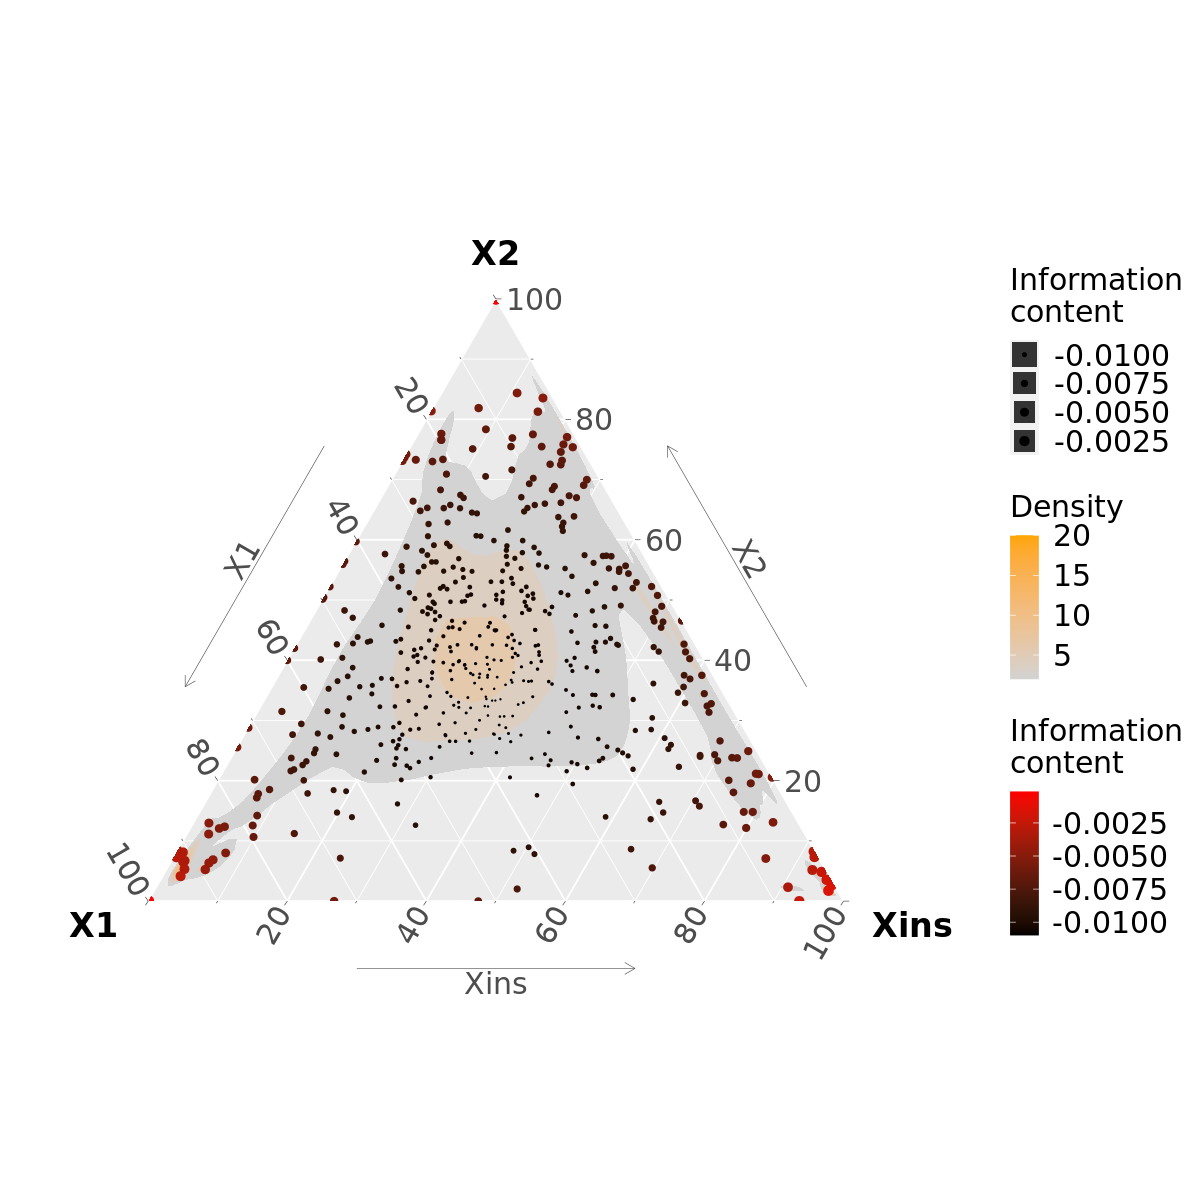

In [20]:
options(repr.plot.width = 10, repr.plot.height = 10)
plot <- ggtern(data=TF_prop, aes(X1.percent,X2.percent,Xins.percent, size=IC, color=IC))
plot <- plot + stat_density_tern(geom='polygon', n = 100, aes(fill  = ..level..), bdl=0.01)
plot <- plot + scale_fill_gradient(name="Density", low = "lightgrey",high = "orange")
plot <- plot + geom_point()
plot <- plot + scale_size(name="Information\ncontent", range = c(0, 2.5))
plot <- plot + Tlab("X2") + Llab("X1") + Rlab("Xins")
plot <- plot + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text=element_text(size=18), axis.title=element_text(size=20,face="bold"), legend.title=element_text(size=18), legend.text=element_text(size=18))
plot <- plot + theme_showarrows()
#plot <- plot + geom_Rline(Rintercept=0.5, colour="red4") + geom_Lline(Lintercept=0.5, colour="red4") + geom_Tline(Tintercept=0.5, colour="red4")
#plot <- plot + geom_Rline(Rintercept=0, colour="black") + geom_Lline(Lintercept=0.0, colour="black") + geom_Tline(Tintercept=0.0, colour="black")
plot <- plot + scale_color_gradient(name="Information\ncontent", low="black", high="red")
#plot <- plot + ggtitle("Ternary plot of FACS expression of \n potential transcription factors")
plot

**Fig-2-6-1** *Ternary plot of transcription factor expression values*

## 2.2 Clustering heatmap

Hierarchical clustering of TF proportional expression values was performed. 

In [2]:
library(ComplexHeatmap)

In [4]:
library(compositions)

In [8]:
df = as.matrix(TF_prop[,16:18])
colnames(df) = c("X1", "X2", "Xins")

In [11]:
options(repr.plot.width = 10, repr.plot.height = 10)
ha = Heatmap(df, cluster_rows = hclust(dist(rplus(df)), method="ward.D"), cluster_columns = hclust(dist(rplus(t(df))), method="ward.D"), rect_gp = gpar(col = "white", lwd = 0.3), column_title = "Cell compartments", row_title = "Transcription factors", column_title_gp = gpar(fontsize = 20), row_title_gp = gpar(fontsize = 20), 
        column_dend_height = unit(2, "cm"), row_dend_width = unit(6, "cm"), column_names_side = "top", column_names_rot = 0, column_names_gp = gpar(fontsize = 15), column_names_centered = TRUE, 
       row_split = 5, row_gap = unit(5, "mm"), heatmap_legend_param = list(title = "Proportional\nexpression\n", legend_height = unit(6, "cm"), grid_width = unit(1, "cm"), title_gp = gpar(fontsize = 15), labels_gp = gpar(fontsize = 10)))

In [13]:
library(circlize)
col_fun = colorRamp2(c(3.5, 5), c("white", "red"))

In [16]:
row_1 = rowAnnotation(IC1=TF_prop$IC, col=list(IC1 = col_fun), show_legend = FALSE, show_annotation_name = FALSE)
row_2 = rowAnnotation(IC = anno_points(TF_prop$IC, pch=1, gp = gpar(col = 2), width = unit(2, "cm")))

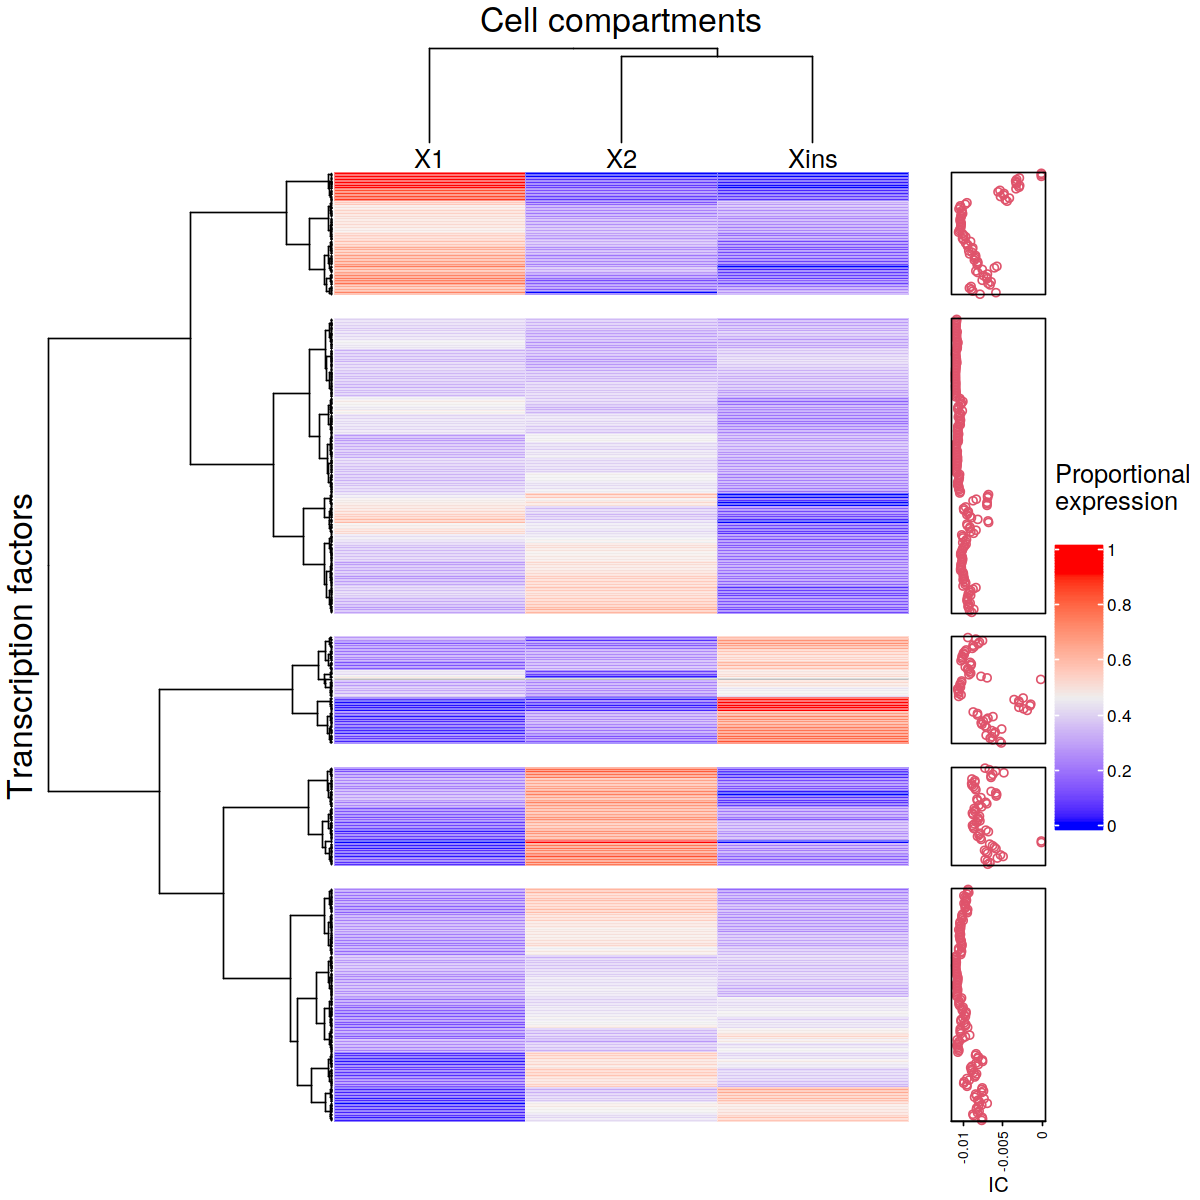

In [18]:
options(repr.plot.width = 10, repr.plot.height = 10)
ha + row_1 + row_2

**Fig-2-6-2** *Hierarchical clustering of proportional expression values.*

# 3. Transcription factor classes

In [1]:
TF_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")

In [2]:
levels(as.factor(TF_prop$TF.class))

[1] "Alpha-helical"       "Basic domain"        "Beta-barrel"        
 [4] "Beta-hairpin"        "Beta-sheet"          "Helix-turn-helix"   
 [7] "Immunoglobulin-fold" "Other"               "Zinc"               
[10] "ZInc"                "Zinc "

## 3.1 Basic domains

In [3]:
TF1 = subset(TF_prop, TF_prop$TF.class == "Basic domain")

In [4]:
classes = levels(as.factor(TF1$TF.group))
name = c() 
value = c()
ident = c()
for (i in 1:length(classes)){
    name = c(name, rep(classes[i], 2))
    value = c(value, nrow(subset(TF1, (TF1$TF.group == classes[i])&(TF1$Identification == 1))), nrow(subset(TF1, (TF1$TF.group == classes[i])&(TF1$Identification == 0))))
    ident = c(ident, c("a", "b"))
}
df1 = data.frame(name, value, ident)

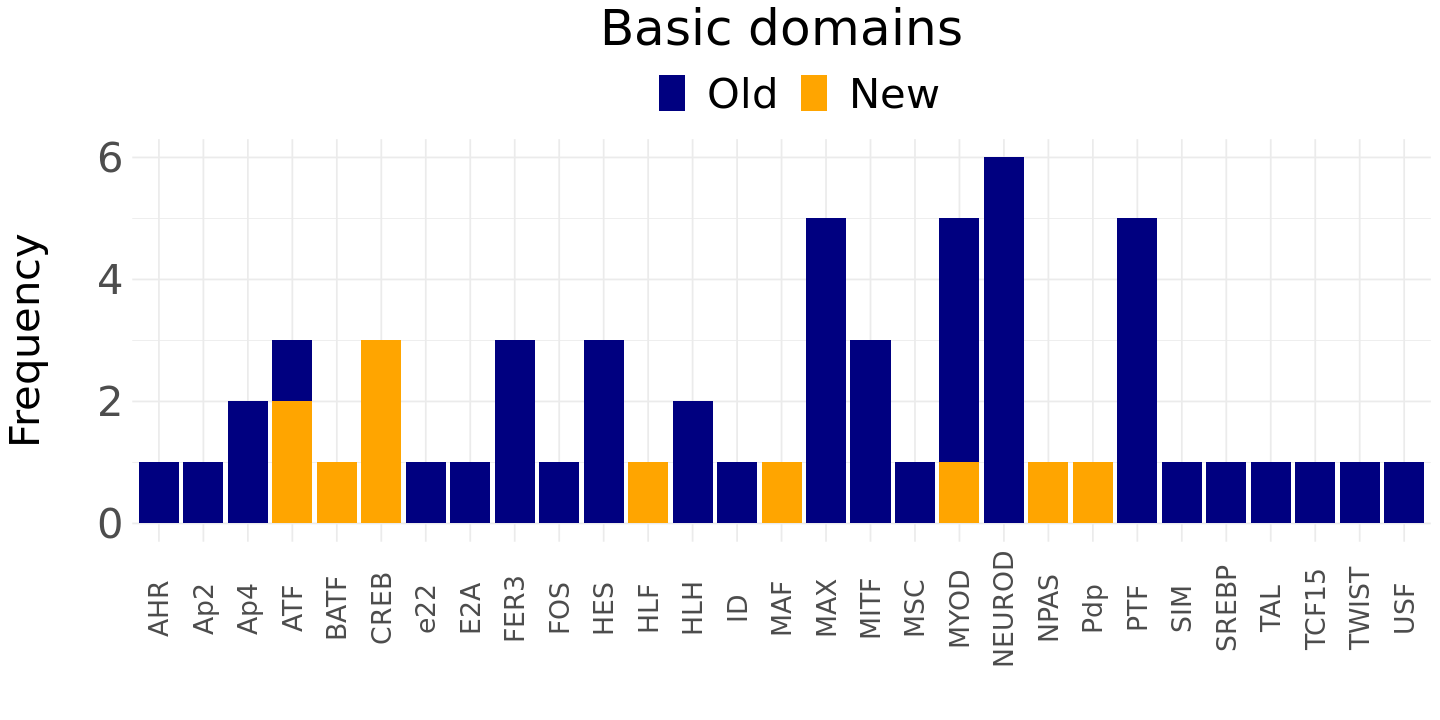

In [36]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 6)
p = ggplot(df1, aes(x=name, y=value, fill=ident))+geom_bar(position="stack", stat="identity")
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=16, angle=90, vjust=0.475), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + scale_fill_manual(name=" ", labels=c("Old", "New"), values=c("navyblue", "orange"))
p = p + xlab(" ") + ylab("Frequency\n")+ggtitle("Basic domains")
p

**Fig-2-6-3** *Classification and characterisation of TFs with a basic domain*

## 3.2 Zinc domains

In [1]:
TF_prop = read.csv("/drives/raid/AboobakerLab/jakke/TF_data/Transcription_factors_01072021_values.csv")

In [2]:
TF2 = subset(TF_prop, (TF_prop$TF.class == "Zinc")|(TF_prop$TF.class == "ZInc")|(TF_prop$TF.class == "Zinc "))

In [3]:
classes = levels(as.factor(TF2$TF.group))
name = c() 
value = c()
ident = c()
for (i in 1:length(classes)){
    name = c(name, rep(classes[i], 2))
    value = c(value, nrow(subset(TF2, (TF2$TF.group == classes[i])&(TF2$Identification == 1))), nrow(subset(TF2, (TF2$TF.group == classes[i])&(TF2$Identification == 0))))
    ident = c(ident, c("a", "b"))
}
df2 = data.frame(name, value, ident)

In [4]:
df2[df2$name == "POGK",]$name = "POGK-LIKE"
df2[df2$name == "ZSCAN",]$name = "ZSCAN-LIKE"

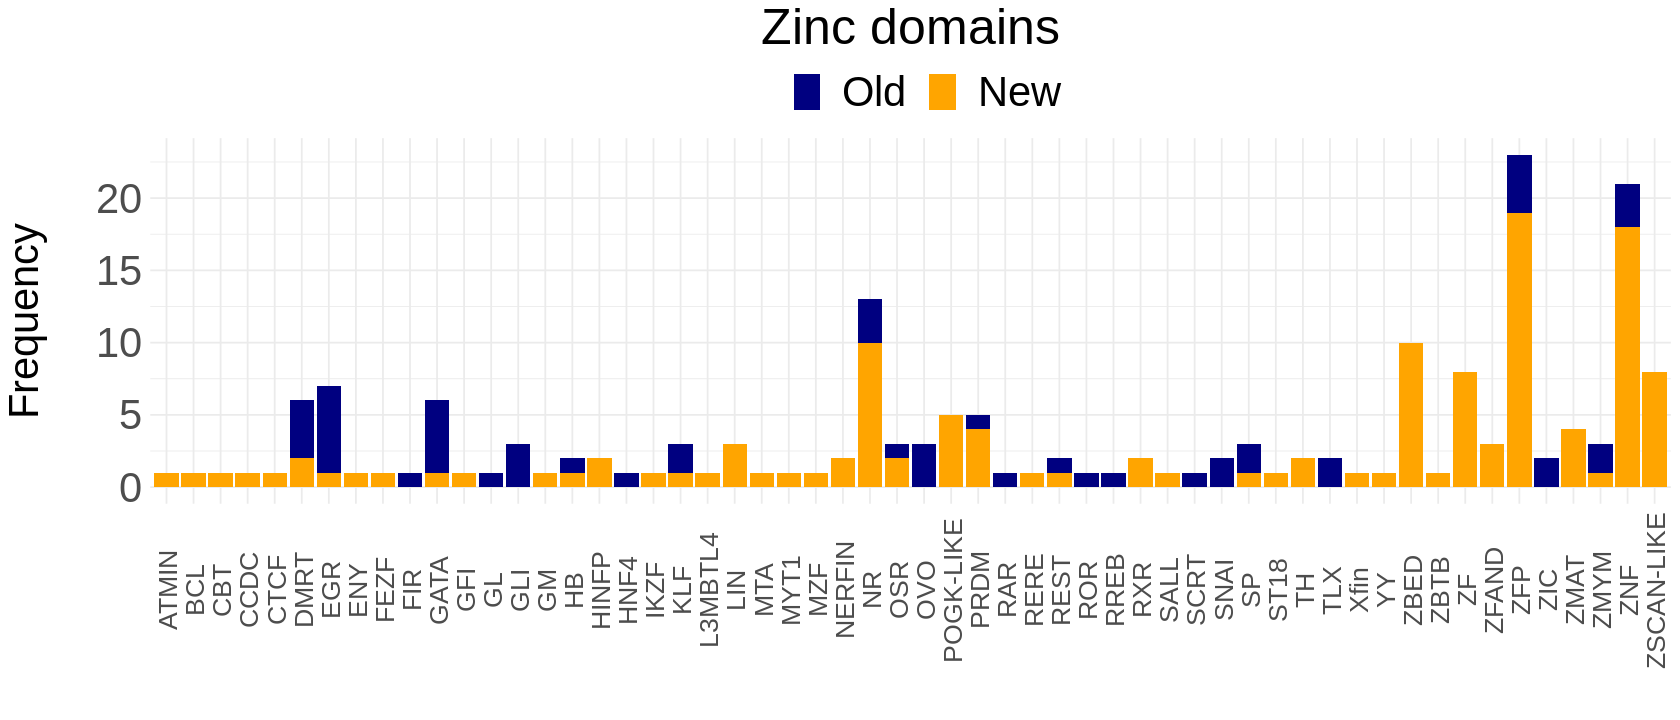

In [5]:
library(ggplot2)
options(repr.plot.width = 14, repr.plot.height = 6)
p = ggplot(df2, aes(x=name, y=value, fill=ident))+geom_bar(position="stack", stat="identity")
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=16, angle=90, vjust=0.6), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + scale_fill_manual(name=" ", labels=c("Old", "New"), values=c("navyblue", "orange"))
p = p + xlab(" ") + ylab("Frequency\n")+ggtitle("Zinc domains")
p

**Fig-2-6-4** *Classification and characterisation of TFs with a zinc domain*

## 3.3 Helix-turn-helix domains

In [28]:
TF3 = subset(TF_prop, (TF_prop$TF.class == "Helix-turn-helix"))

In [29]:
classes = levels(as.factor(TF3$TF.group))
name = c() 
value = c()
ident = c()
for (i in 1:length(classes)){
    name = c(name, rep(classes[i], 2))
    value = c(value, nrow(subset(TF3, (TF3$TF.group == classes[i])&(TF3$Identification == 1))), nrow(subset(TF3, (TF3$TF.group == classes[i])&(TF3$Identification == 0))))
    ident = c(ident, c("a", "b"))
}
df3 = data.frame(name, value, ident)

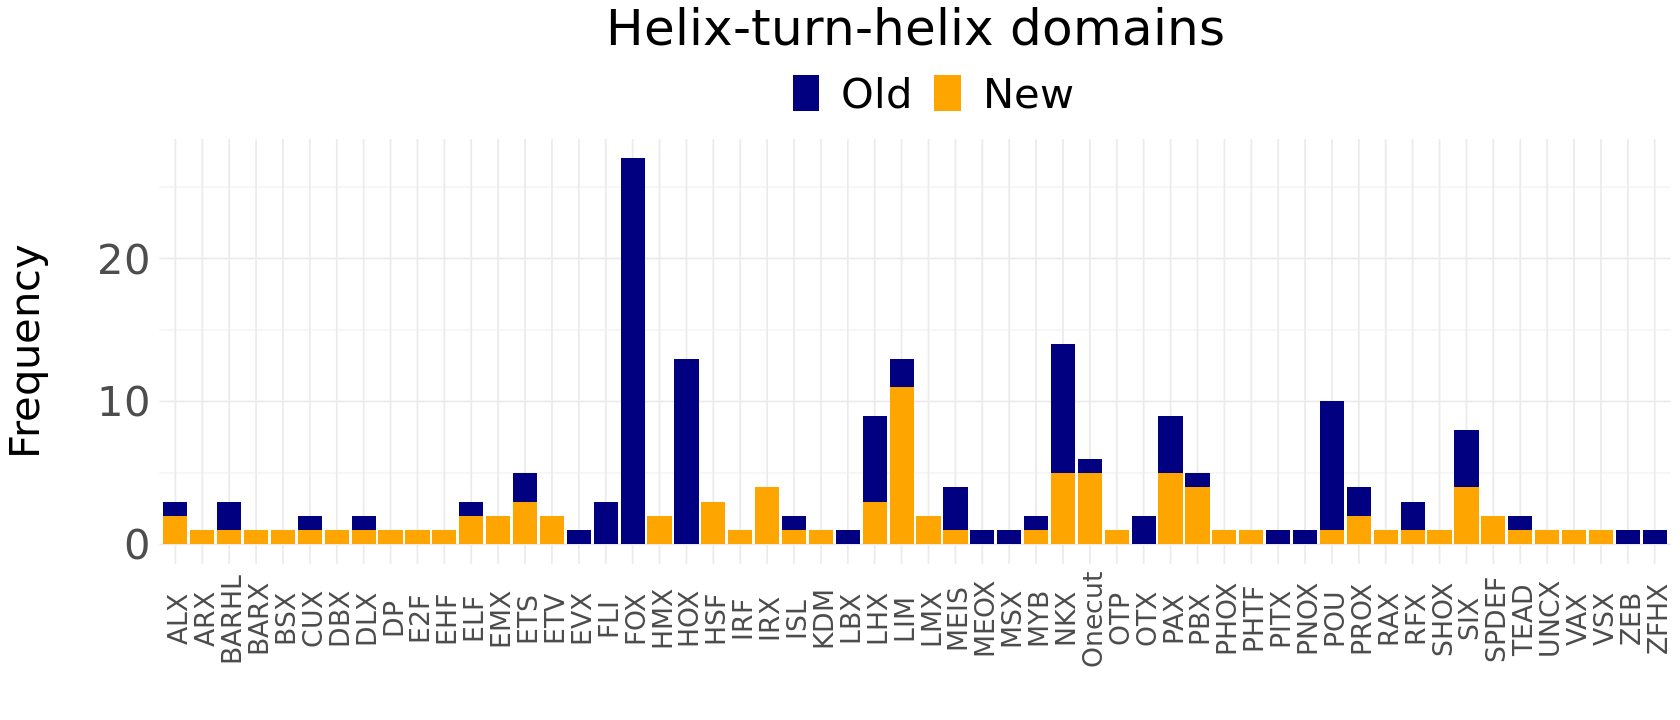

In [32]:
library(ggplot2)
options(repr.plot.width = 14, repr.plot.height = 6)
p = ggplot(df3, aes(x=name, y=value, fill=ident))+geom_bar(position="stack", stat="identity")
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=16, angle=90, vjust=0.6), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + scale_fill_manual(name=" ", labels=c("Old", "New"), values=c("navyblue", "orange"))
p = p + xlab(" ") + ylab("Frequency\n")+ggtitle("Helix-turn-helix domains")
p

**Fig-2-6-5** *Classification and characterisation of TFs with a helix-turn-helix domains*

In [33]:
TF4 = subset(TF_prop, (TF_prop$TF.class == "Other")|(TF_prop$TF.class == "Immunoglobulin-fold")|(TF_prop$TF.class == "Beta-hairpin")|(TF_prop$TF.class == "Beta-barrel")|(TF_prop$TF.class == "Beta-sheet")|(TF_prop$TF.class == "Alpha-helical"))

In [34]:
classes = levels(as.factor(TF4$TF.group))
name = c() 
value = c()
ident = c()
for (i in 1:length(classes)){
    name = c(name, rep(classes[i], 2))
    value = c(value, nrow(subset(TF4, (TF4$TF.group == classes[i])&(TF4$Identification == 1))), nrow(subset(TF4, (TF4$TF.group == classes[i])&(TF4$Identification == 0))))
    ident = c(ident, c("a", "b"))
}
df4 = data.frame(name, value, ident)

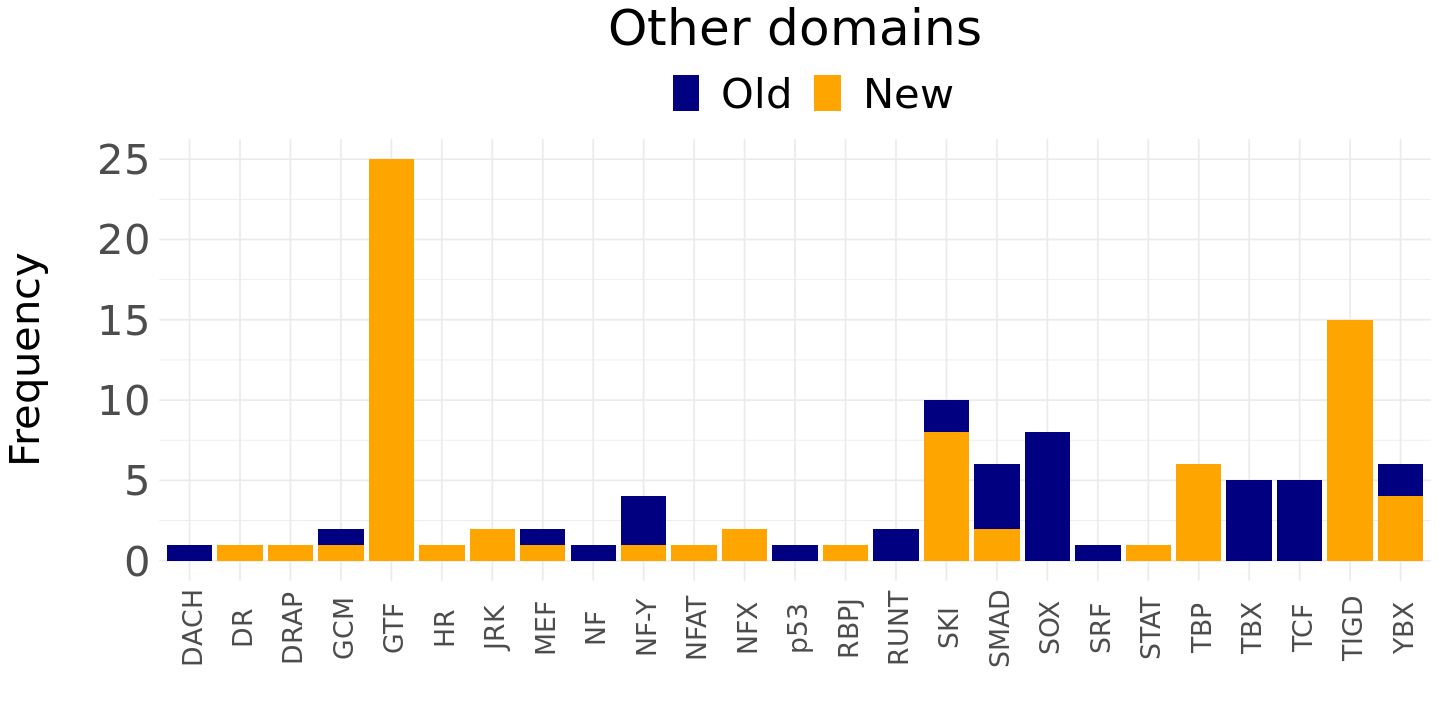

In [35]:
library(ggplot2)
options(repr.plot.width = 12, repr.plot.height = 6)
p = ggplot(df4, aes(x=name, y=value, fill=ident))+geom_bar(position="stack", stat="identity")
p = p + theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=16, angle=90, vjust=0.6), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=25), legend.position="top")
p = p + scale_fill_manual(name=" ", labels=c("Old", "New"), values=c("navyblue", "orange"))
p = p + xlab(" ") + ylab("Frequency\n")+ggtitle("Other domains")
p

**Fig-2-6-6** *Classification and characterisation of TFs with other domains*

# 4. Motifs

## 4.1 Proportion of TFs with motifs

In [1]:
TF_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")

In [3]:
nrow(TF_prop)

[1] 551

In [9]:
length(levels(as.factor(TF_prop$Jaspar.MatrixID)))-1

[1] 166

In [13]:
nrow(subset(TF_prop, TF_prop$Jaspar.MatrixID == 0))
551-263

[1] 263

[1] 288

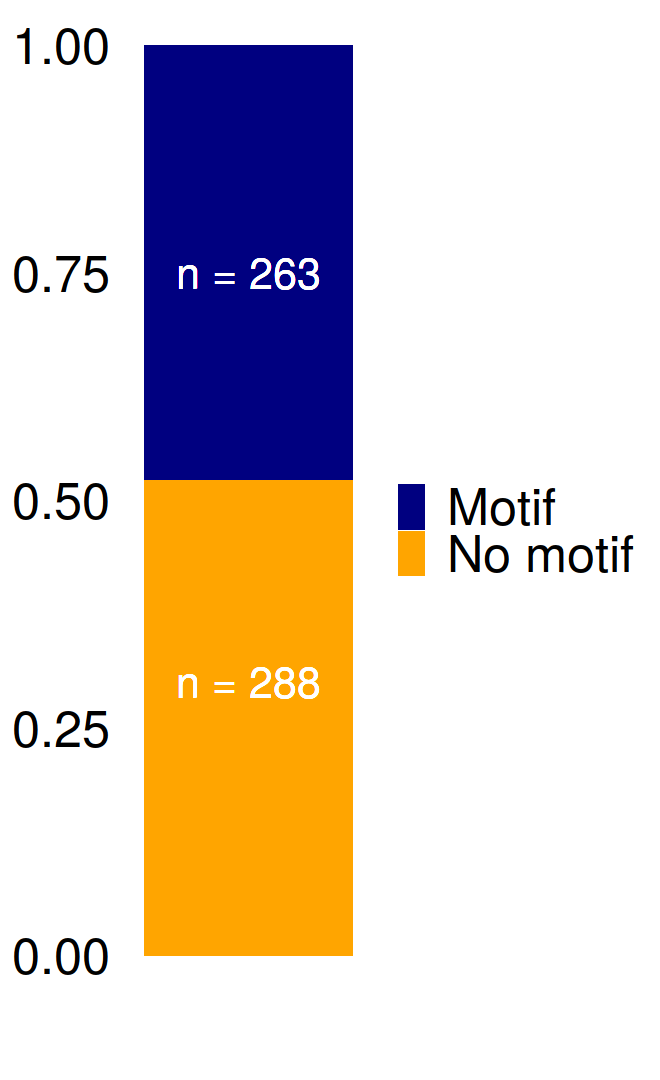

In [19]:
library(ggplot2)
options(repr.plot.width = 5.5, repr.plot.height = 9)
df = data.frame(class=factor(c("Motif", "No motif"), levels=c("Motif", "No motif")), value=c(263, 288), id = rep(" ", 4))
p = ggplot(df, aes(fill=class, y=value, x = factor(id))) + geom_bar(position="fill", stat="identity")
p = p + theme_void()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=30), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.title=element_text(size=25), legend.text=element_text(size=30))
p = p + scale_fill_manual(name=" ", values=c("navyblue", "orange"))
#p = p + coord_flip()
p = p + ylab(" ") + xlab(" ") 
#p = p + guides(fill=guide_legend(nrow=4,byrow=TRUE))
p = p + geom_text(aes(label=c("n = 263"), y=c(0.75)), size = 9, col="white")
p = p + geom_text(aes(label=c("n = 288"), y=c(0.3)), size = 9, col="white")
p

**Fig-2-6-7** *Proportion of TFs with motifs*

In [37]:
motifs_number = c()
motifs_name = c()
for (i in 2:length(table(as.factor(TF_prop$Jaspar.MatrixID)))){
    motifs_number = c(motifs_number,table(as.factor(TF_prop$Jaspar.MatrixID))[i][[1]])
    motifs_name = c(motifs_name,names(table(as.factor(TF_prop$Jaspar.MatrixID)))[i])
}

In [38]:
motifs_df = data.frame("motifs_name" = motifs_name, "motifs_number"=motifs_number)

In [56]:
motifs_df[with(motifs_df, order(motifs_number, decreasing=TRUE)),][1:7,]

,motifs_name,motifs_number
,<chr>,<int>
27,MA0139.1,10
14,MA0056.1,9
152,MA0851.1,9
107,MA0679.1,6
25,MA0130.1,5
80,MA0528.1,5
84,MA0537.1,5


In [52]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0139.1", ]$Symbol

[1] "hinfp-1"  "hinfp-2"  "rest-1"   "zfp674"   "znf-1"    "znf91"   
 [7] "znf333-1" "znf652"   "zscan2-2" "zscan2-6"

In [53]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0056.1", ]$Symbol

[1] "sall4"    "fir1"     "zfp-8"    "zfp236-1" "zfp354"   "znf101"   "znf425"  
[8] "znf660"   "lmpt-3"

In [48]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0851.1", ]$Symbol

[1] "foxQ/D"    "foxJ1-1"   "foxJ1-2"   "foxJ1-3"   "foxJ1-4"   "foxJ1-5"  
[7] "foxN2/3-1" "foxN2/3-2" "foxN2/3-3"

In [49]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0679.1", ]$Symbol

[1] "onecut-1" "onecut-2" "onecut-3" "onecut-5" "hnf6"     "cux-2"

In [53]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0130.1", ]$Symbol

[1] "zfp-2"    "zfp236-2" "zfp560-2" "znf799"   "zscan2-1"

In [54]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0528.1", ]$Symbol

[1] "egr-1"  "ovo-1"  "prdm13" "gl"     "znf341"

In [55]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0537.1", ]$Symbol

[1] "prdm1-1"  "zfp-3"    "zfp878"   "zbed1"    "zscan2-7"

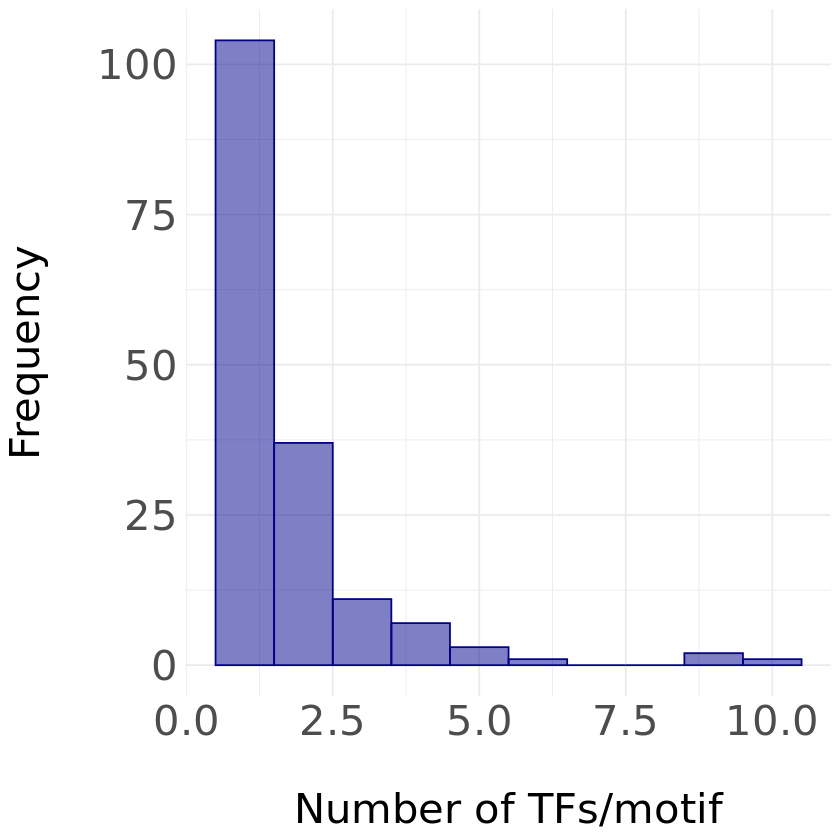

In [40]:
library(ggplot2)
p = ggplot(motifs_df, aes(x=motifs_number))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=10)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nNumber of TFs/motif")+ylab("Frequency\n")
p

**Fig-2-6-8** *Number of transcription factors per motif*

## 4.2 Information value histogram

In [56]:
meme_list = read.table("/hydra/TF_data/April2021motifs/memename.list")

In [57]:
ic_scores = c()
names = c()
for (i in 1:nrow(meme_list)){
    file <- paste("/hydra/TF_data/April2021motifs/", toString(meme_list[i, 1]), sep="")
    meme = read_meme(file)
    ic_scores = c(ic_scores, meme["icscore"])
    names = c(names, meme["name"])
}

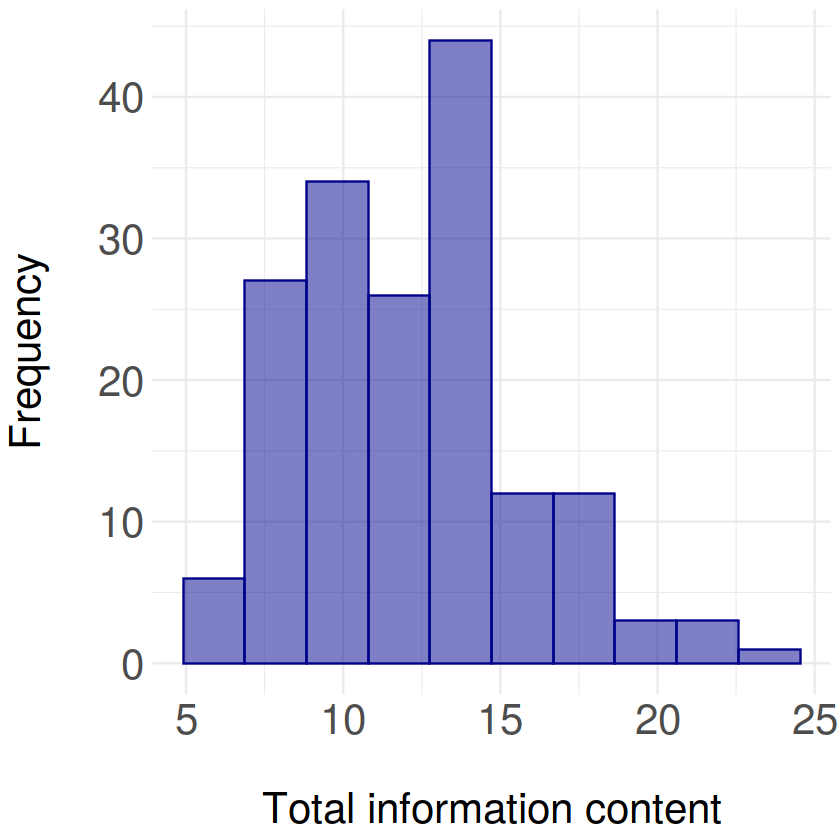

In [63]:
library(ggplot2)
options(repr.plot.width = 7.0, repr.plot.height = 7.0)
df = data.frame(num = ic_scores)
p = ggplot(df, aes(x=num))+geom_histogram(col="darkblue", fill="darkblue", alpha = 0.5, bins=10)+theme_minimal()
p = p + theme(plot.title = element_text(hjust = 0.5), title=element_text(size=25), axis.text.y=element_text(size=25), axis.text.x=element_text(size=25), axis.title=element_text(size=25), legend.position="none", legend.title=element_text(), legend.text=element_text(size=25))
p = p + xlab("\nTotal information content")+ylab("Frequency\n")+
p

**Fig-2-6-8** *Histogram of total information content of motifs*

In [65]:
ic_df = data.frame("Name" = names, "IC" = ic_scores)

## 4.3 Information value logos

In [71]:
ic_df[order(ic_df$IC, decreasing=TRUE),][1:10,]

,Name,IC
,<chr>,<dbl>
27,MA0138.2,23.08105
138,MA0782.1,21.43123
139,MA0783.1,21.16268
130,MA0737.1,20.97594
79,MA0510.2,20.43481
110,MA0685.1,19.94932
116,MA0696.1,18.77239
16,MA0066.1,18.43854
99,MA0660.1,18.35049


In [82]:
ic_df[order(ic_df$IC),][1:10,]

,Name,IC
,<chr>,<dbl>
168,MA1099.1,5.416703
60,MA0254.1,6.331720
49,MA0217.1,6.408911
55,MA0243.1,6.597286
122,MA0703.1,6.722136
159,MA0877.1,6.789411
127,MA0721.1,7.043505
34,MA0158.1,7.095129
160,MA0879.1,7.238603


In [74]:
library(seqLogo)

Loading required package: grid



In [83]:
TF_prop = read.csv("/hydra/TF_data/Transcription_factors_01072021_values.csv")

### Zfp-7

In [88]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0138.2",]$Symbol

[1] "zfp-7"

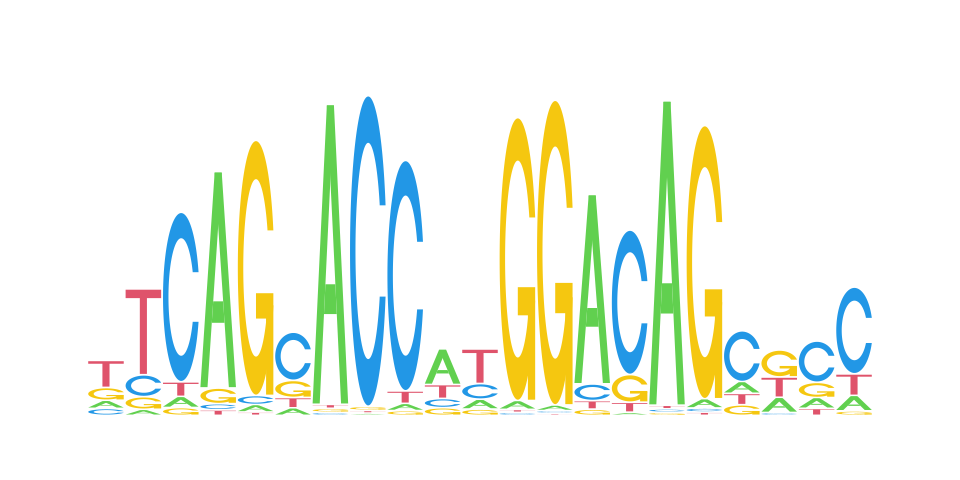

In [76]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0138.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Pbx

In [89]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0782.1",]$Symbol

[1] "Pbx-4"

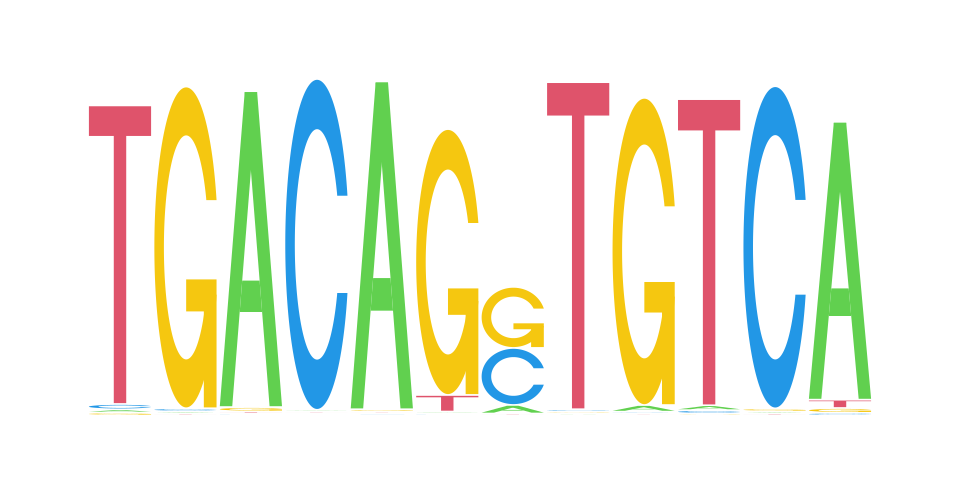

In [77]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0782.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Prep

In [90]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0783.1",]$Symbol

[1] "Prep"

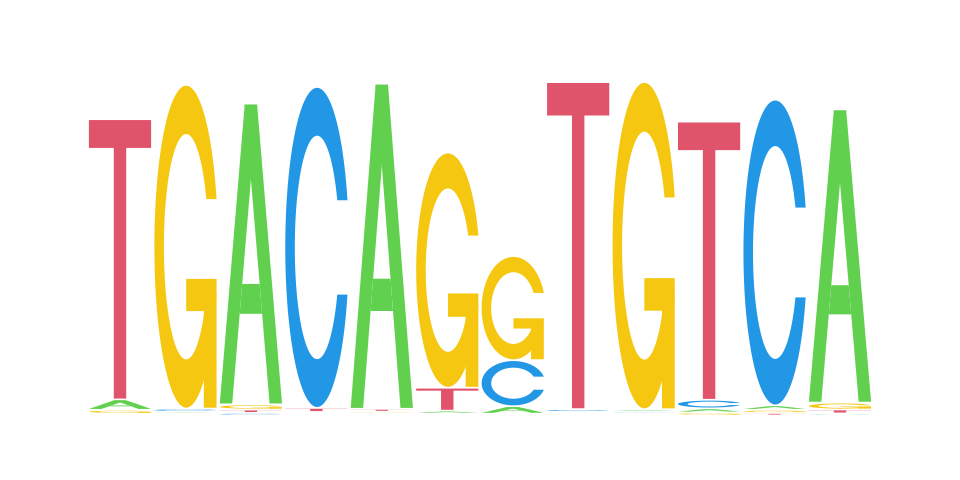

In [78]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0783.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Gli-3

In [91]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0737.1",]$Symbol

[1] "gli-3"

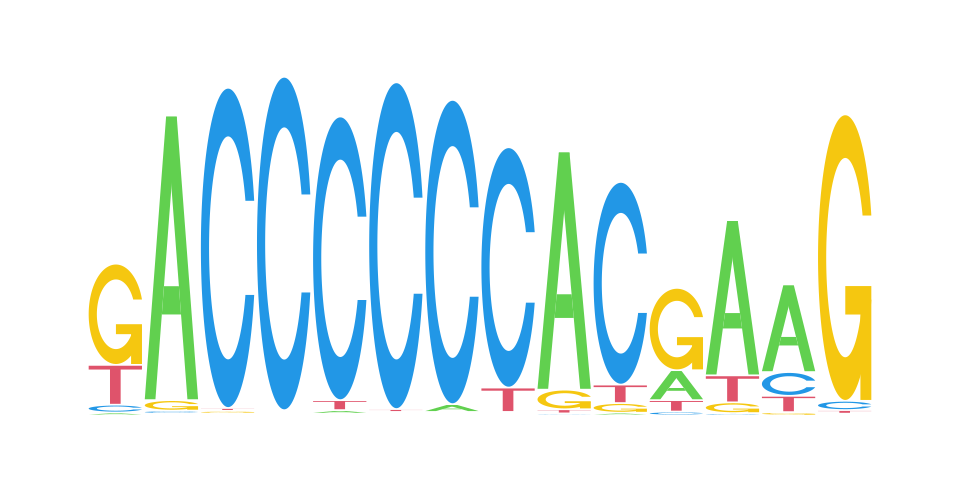

In [79]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0737.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Rfx7

In [92]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0510.2",]$Symbol

[1] "rfx7"

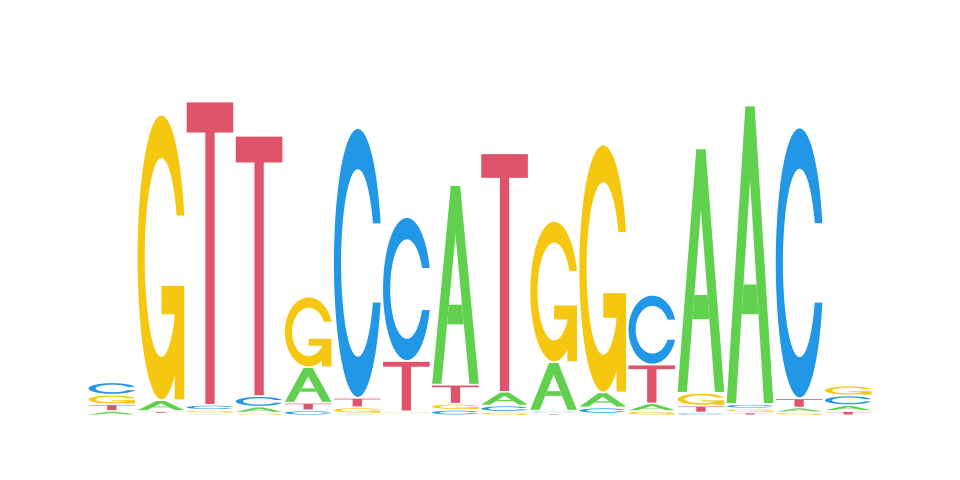

In [80]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0510.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Hesl-2

In [93]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA1099.1",]$Symbol

[1] "hesl-2"

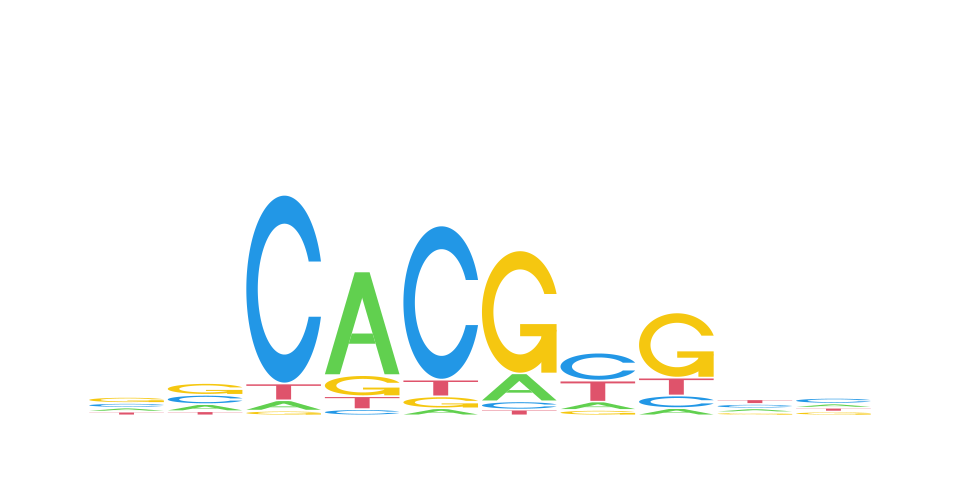

In [94]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA1099.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Pou2/3

In [95]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0254.1",]$Symbol

[1] "pou2/3-1" "pou2/3-2"

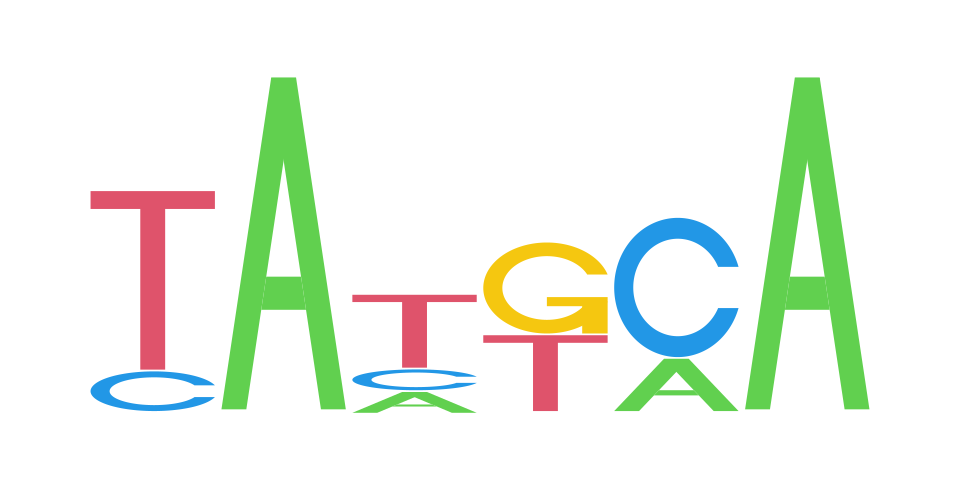

In [96]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0254.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Irx

In [97]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0217.1",]$Symbol

[1] "irx-1"  "irx6-1" "irx6-2" "irx6-3"

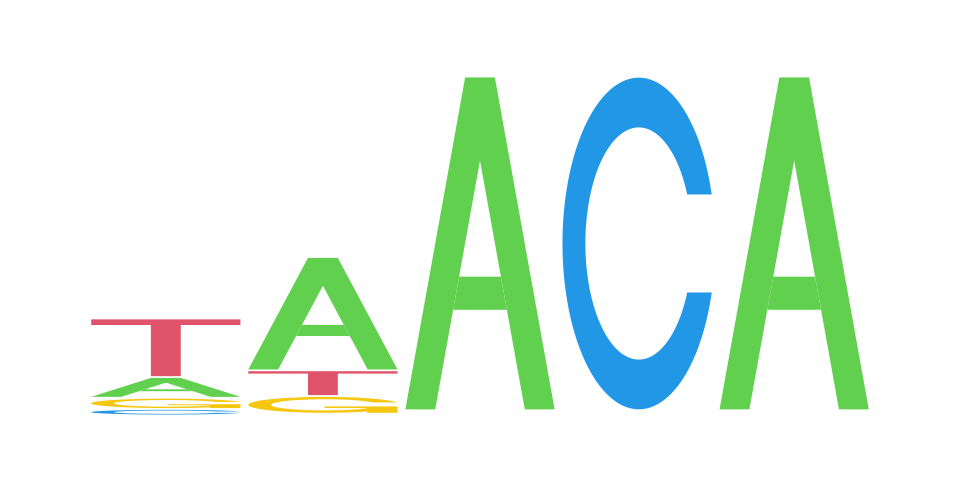

In [98]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0217.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Tead1

In [99]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0243.1",]$Symbol

[1] "tead1"

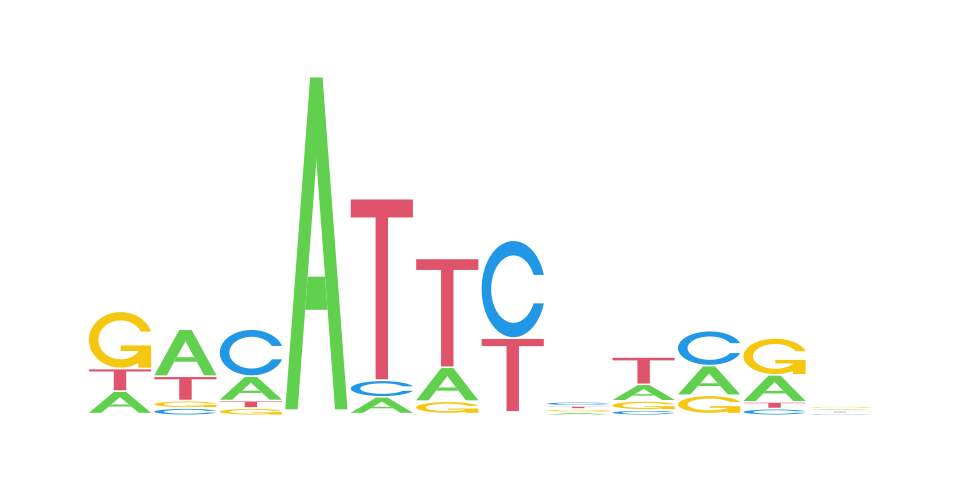

In [100]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0243.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

### Lmx

In [101]:
TF_prop[TF_prop$Jaspar.MatrixID == "MA0703.1",]$Symbol

[1] "lmx1-1"

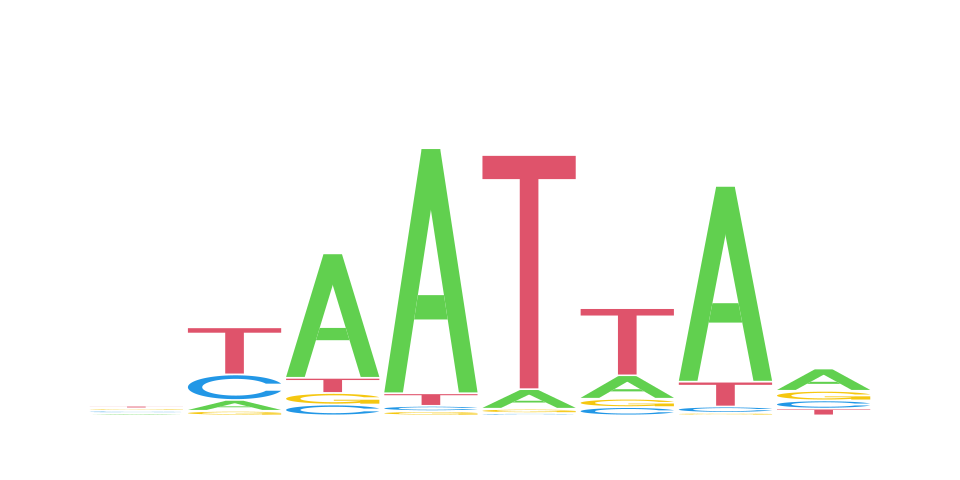

In [102]:
options(repr.plot.width=8, repr.plot.height=4)
seqLogo(convert_motifs(read_meme("/hydra/TF_data/April2021motifs/MA0703.meme"), class = "seqLogo-pwm"), xaxis=FALSE, yaxis=FALSE)

**Fig-2-6-9** *Logos of selected motifs*

## 4.3 Isoforms of transcription factors

In [4]:
library(GenomicFeatures)
library(Gviz)
library(rtracklayer)

In [5]:
txdb = makeTxDbFromGFF("/hydra/sexual_genome_annotation_files/ncrna_Neiro/stringtie.Bioconductor.gtf", format = "gtf")

Import genomic features from the file as a GRanges object ... 
OK

Prepare the 'metadata' data frame ... 
OK

Make the TxDb object ... 
OK



In [23]:
options(ucscChromosomeNames=FALSE)
txTr <- GeneRegionTrack(txdb, chromosome = "dd_Smes_g4_1", start = 11234218-5000,  end = 11237544+5000, fill="orange", name="Isoforms", fontsize=10)
gtrack <- GenomeAxisTrack(cex=2)

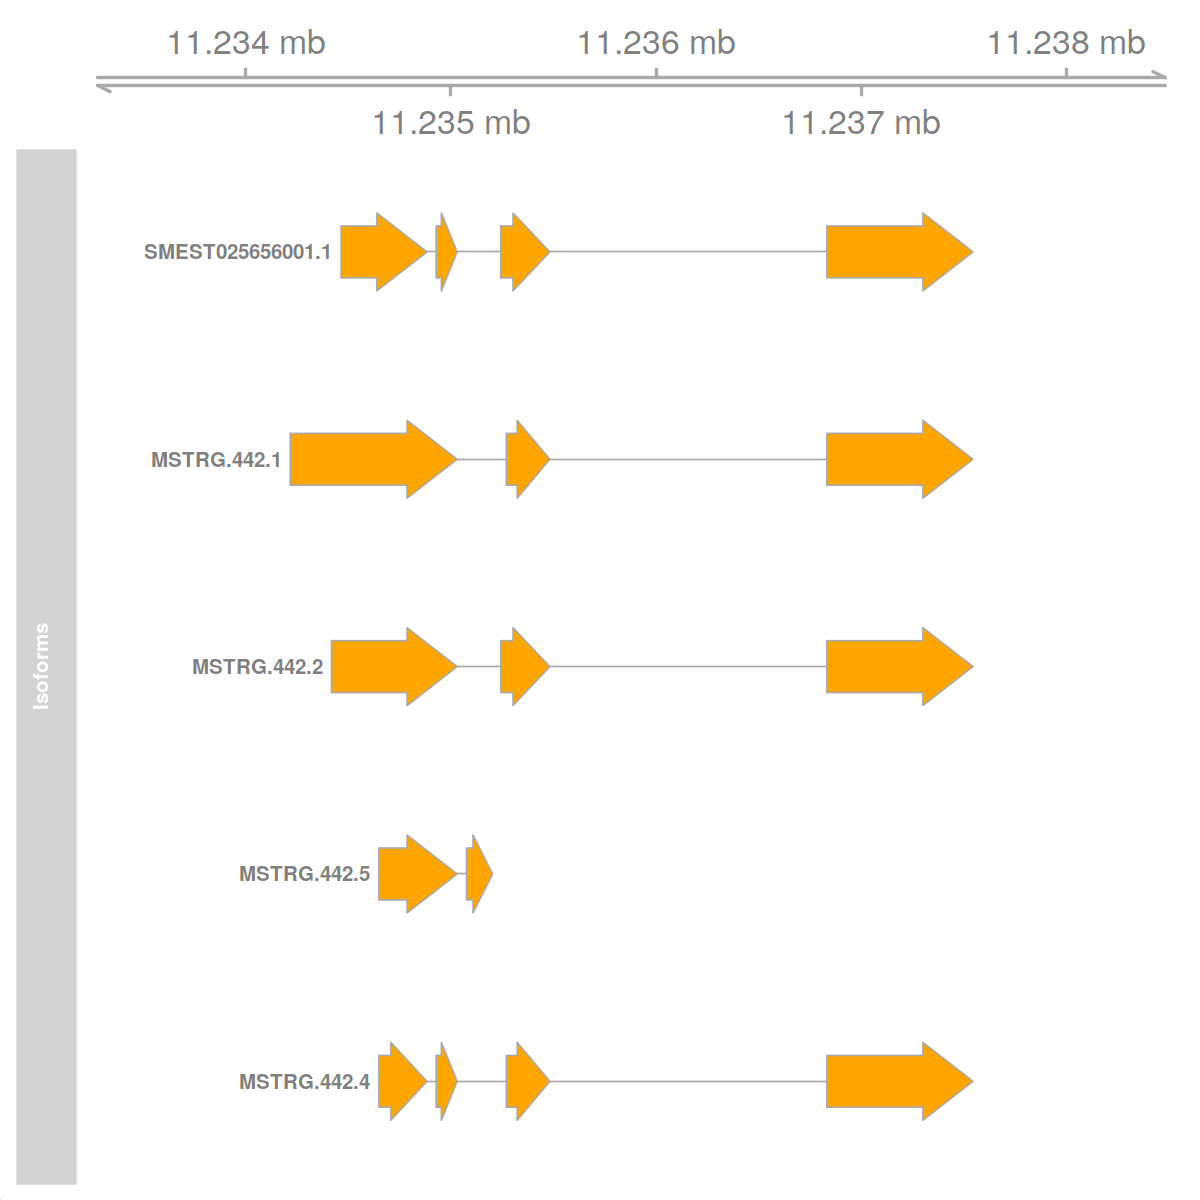

In [27]:
options(repr.plot.width = 10, repr.plot.height = 10)
plotTracks(c(gtrack, txTr), transcriptAnnotation = "symbol", cex.group=1.0, from=11234218-1000, to=11237544+1000, shape = "arrow", featureAnnotation = "id")

# FINNISHED